In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
df = pd.read_csv("../datasets/GoldCoast_network.csv")

In [5]:
G = nx.from_pandas_edgelist(df, source = "From", target= "To", create_using=nx.DiGraph)

In [18]:
avg_in_degree = np.mean(list(dict(G.in_degree()).values()))
avg_out_degree = np.mean(list(dict(G.out_degree()).values()))

print(avg_in_degree)
print(avg_out_degree)

2.3290821660045995
2.3290821660045995


In [19]:
dict_betweeness = nx.edge_betweenness_centrality(G, normalized=True)

In [23]:
data = list(dict(dict_betweeness).values())

(array([1.033e+04, 4.760e+02, 1.250e+02, 7.900e+01, 3.200e+01, 1.700e+01,
        3.000e+01, 3.800e+01, 7.000e+00, 6.000e+00]),
 array([6.55814941e-08, 1.50455536e-02, 3.00910417e-02, 4.51365297e-02,
        6.01820177e-02, 7.52275058e-02, 9.02729938e-02, 1.05318482e-01,
        1.20363970e-01, 1.35409458e-01, 1.50454946e-01]),
 <BarContainer object of 10 artists>)

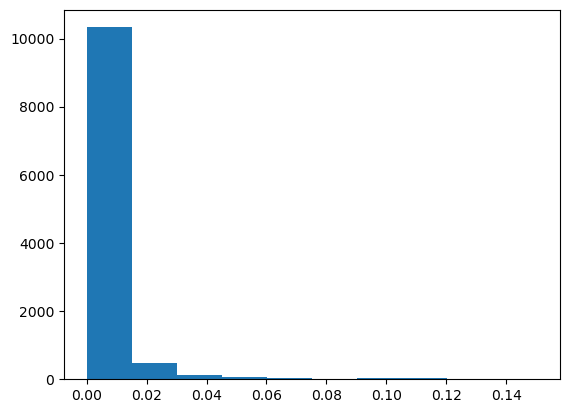

In [24]:
plt.hist(data)

In [30]:
in_degree_sequence = sorted((d for n, d in G.in_degree()), reverse = True)
out_degree_sequence = sorted((d for n, d in G.out_degree()), reverse = True)

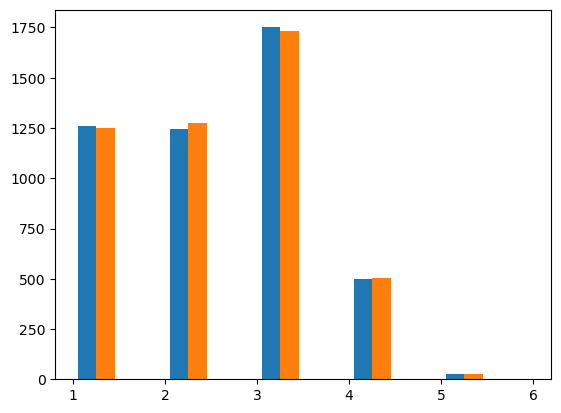

In [33]:
plt.hist([in_degree_sequence, out_degree_sequence])
plt.show()

In [15]:
dd = Counter(dict(G.out_degree).values())
dd

Counter({3: 1730, 2: 1273, 1: 1249, 4: 503, 5: 25, 6: 3})

In [16]:
df_count = pd.DataFrame(list(dd.items()), columns=("k", "count")).sort_values(by="k")
df_count

,k,count
0,1,1249
1,2,1273
2,3,1730
3,4,503
4,5,25
5,6,3


In [17]:
ccdf = df_count.sort_values(by = "k", ascending = False)
ccdf

,k,count
5,6,3
4,5,25
3,4,503
2,3,1730
1,2,1273
0,1,1249


In [18]:
ccdf["cumsum"] = ccdf["count"].cumsum()

In [19]:
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf

,k,count,cumsum,ccdf
5,6,3,3,0.000627
4,5,25,28,0.005854
3,4,503,531,0.111018
2,3,1730,2261,0.472716
1,2,1273,3534,0.738867
0,1,1249,4783,1.000000


In [20]:
ccdf = ccdf[["k", "ccdf"]].sort_values(ascending = True, by = "k")
ccdf

,k,ccdf
0,1,1.000000
1,2,0.738867
2,3,0.472716
3,4,0.111018
4,5,0.005854
5,6,0.000627


<Axes: xlabel='k'>

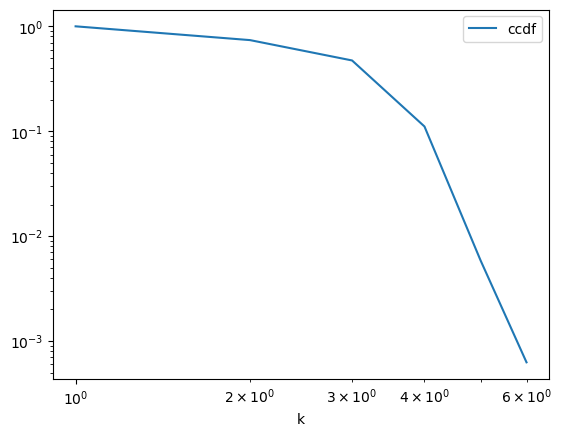

In [21]:
ccdf.plot(loglog=True, x= "k", y="ccdf")

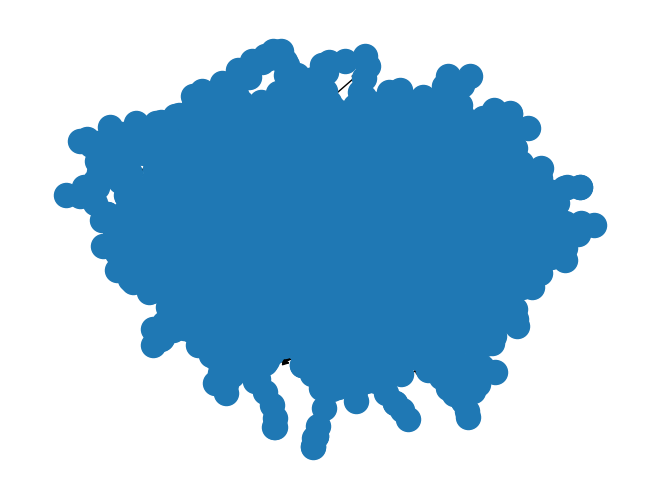

In [14]:
nx.draw(G)

In [54]:
dictionary = nx.clustering(G)
dictionary[2059]

KeyError: 2059

In [58]:
sum(dictionary.values())/len(dictionary)


0.030861030321908758